In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
from astropy.nddata.utils import Cutout2D
from astropy.visualization import MinMaxInterval, SqrtStretch, ImageNormalize
import copy

In [3]:
data_location = "/Users/benwakefield/orbyts repo/DATA/Test Data/"
output_location = "/Users/benwakefield/orbyts repo/OUTPUT/Test Output/"

#### Bring in the .FIT vector catalogue:

In [5]:
hdulist_vec = fits.open(data_location + "afgl961_cat.FIT")
vec = hdulist_vec[1].data

#### Assign all the data to some variables:

In [ ]:
x = vec.field(
    "X"
)  # pixel location along x axis of pixel grid. Central pixel has coods (0,0)
y = vec.field(
    "Y"
)  # pixel location along y axis of pixel grid. Central pixel has coords (0,0)
ra = vec.field("RA")  # Right Ascension. Sky coordinate. In units of radians
dec = vec.field("DEC")  # Declination. SKy cooridiante. In units of radians
i = vec.field("I")  # Stokes I value. This is total intensity recorded at each pixel
di = vec.field("DI")  # This is the error value on Stokes I value
q = vec.field(
    "Q"
)  # This is Stokes Q, which describes a certain type of linear polarization intensity.
dq = vec.field("DQ")  # This is the error value on Stokes Q
u = vec.field(
    "U"
)  # This is Stokes U, which describes another separate kind of linear polarization intensity
du = vec.field("DU")  # This is the error value on Stokes U
p = (
    vec.field("P") / 100
)  # This is polarization fraction. The amount of total light coming in that is polarized
dp = vec.field("DP") / 100  # This is error value on polarization fraction
ang = vec.field(
    "ANG"
)  # This is polarization angle. The orientation of the polarized light that the telescope receives.
dang = vec.field("DANG")  # This is error on the polarization angle value
pi = vec.field(
    "PI"
)  # This is the intensity of all the linearly polarized light. Essentially just the combination of Stokes Q and U
dpi = vec.field("DPI")  # This is the error on the linearly polarized light intensity

#### Lets filter out the noisy, unwanted data, and just take forward the good data:

In [ ]:
filter = np.where(np.logical_and(np.logical_and(p / dp > 3.0, i / di > 5.0), dp < 0.05))


fx = copy.deepcopy(x[filter])
fy = copy.deepcopy(y[filter])
fra = copy.deepcopy(ra[filter])
fdec = copy.deepcopy(dec[filter])
fi = copy.deepcopy(i[filter])
fdi = copy.deepcopy(di[filter])
fq = copy.deepcopy(q[filter])
fdq = copy.deepcopy(dq[filter])
fu = copy.deepcopy(u[filter])
fdu = copy.deepcopy(du[filter])
fp = copy.deepcopy(p[filter])
fdp = copy.deepcopy(dp[filter])
fang = copy.deepcopy(ang[filter])
fdang = copy.deepcopy(dang[filter])
fpi = copy.deepcopy(pi[filter])
fdpi = copy.deepcopy(dpi[filter])

#### Now lets bring in our map (image), and see if we want to crop it

Set OBSGEO-B to    19.822800 from OBSGEO-[XYZ].
Set OBSGEO-H to     4120.022 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN' 'DEC--TAN' 
CRVAL : 98.655625 4.21219444444444 
CRPIX : 131.0 134.0 
PC1_1 PC1_2  : 1.0 0.0 
PC2_1 PC2_2  : 0.0 1.0 
CDELT : -0.00111111111111111 0.0011111111111111 
NAXIS : 266  268


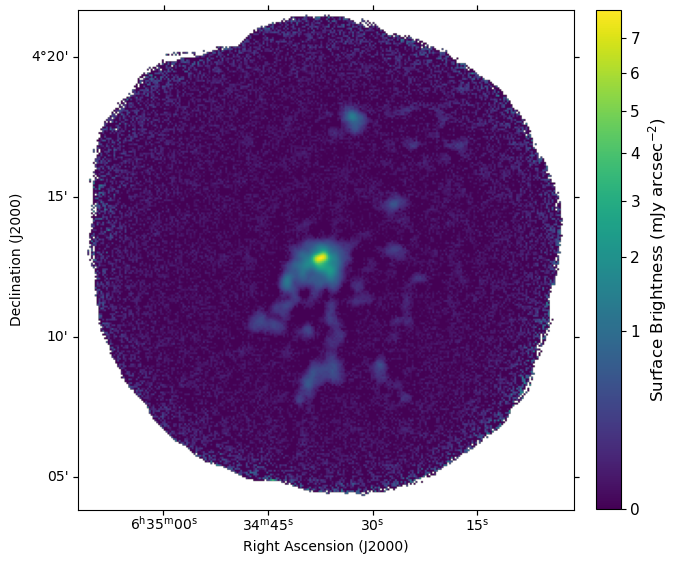

In [ ]:
map = fits.open(
    data_location + "afgl961_Stokes_I.fits"
)  # Stokes I is total intensity, so we are working with an 'intensity map'ArithmeticError

image = np.squeeze(map[0].data)
varience = np.squeeze(map[1].data)

wcs = WCS(map[0].header)
print(wcs.dropaxis(2))  # this gives us lots of useful information about the map


fig = plt.figure(figsize=(7, 7))
ax = plt.subplot(projection=wcs.dropaxis(2))

norm = ImageNormalize(image, vmin=0.0, vmax=np.nanmax(image), stretch=SqrtStretch())

image = plt.imshow(image, origin="lower", norm=norm)  # cmap=cm.Greys,

plt.xlabel("Right Ascension (J2000)")
plt.ylabel("Declination (J2000)")

cbar = plt.colorbar(image, fraction=0.046, pad=0.04)
cbar.set_label(r"Surface Brightness (mJy arcsec$^{-2}$)", size=12)
cbar.ax.tick_params(labelsize=11)
